In [1]:
!mkdir -p ~/dv/imaging/iMars3D/tests/autorecon/huggies/
%cd ~/dv/imaging/iMars3D/tests/autorecon/huggies/

/SNS/users/lj7/dv/imaging/iMars3D/tests/autorecon/huggies


In [2]:
resdir = '/HFIR/CG1D/IPTS-21115/shared/autoreduce/CT-group-2495/'

In [3]:
import os, glob, numpy as np
from imars3d import io
%matplotlib notebook

/SNS/software/miniconda2/envs/py2-cg1d/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
import matplotlib as mpl
plt = mpl.pyplot

In [5]:
ls -tla {resdir}/ | head -n 10

total 33705558
-rwxrwxr-- 1 lj7      users      16777486 Aug 11 20:00 recon_0819.tiff*
drwxrwxr-x 2 lj7      users          2050 Aug 11 20:00 ./
-rwxrwxr-- 1 lj7      users      16777486 Aug 11 20:00 recon_0818.tiff*
-rwxrwxr-- 1 lj7      users      16777486 Aug 11 20:00 recon_0817.tiff*
-rwxrwxr-- 1 lj7      users      16777486 Aug 11 20:00 recon_0816.tiff*
-rwxrwxr-- 1 lj7      users      16777486 Aug 11 20:00 recon_0815.tiff*
-rwxrwxr-- 1 lj7      users      16777486 Aug 11 20:00 recon_1844.tiff*
-rwxrwxr-- 1 lj7      users      16777486 Aug 11 20:00 recon_1843.tiff*
-rwxrwxr-- 1 lj7      users      16777486 Aug 11 20:00 recon_1842.tiff*
ls: write error


In [10]:
t0 = io.ImageFile(os.path.join(resdir, 'recon_1500.tiff')).data

In [12]:
median = np.median(t0[t0>0])

In [13]:
median

memmap(0.0001474886084906757, dtype=float32)

<IPython.core.display.Javascript object>


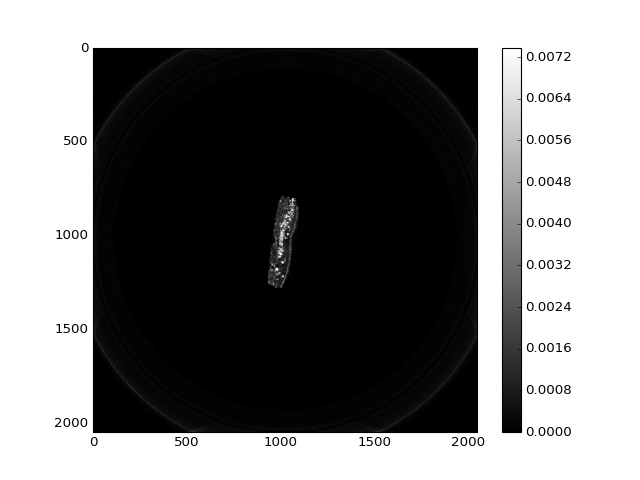

In [15]:
plt.figure()
plt.imshow(t0, cmap='gray')
plt.clim(0, median*50)
plt.colorbar()

In [16]:
max = median*50

In [25]:
max

memmap(0.007374430424533784)

<IPython.core.display.Javascript object>


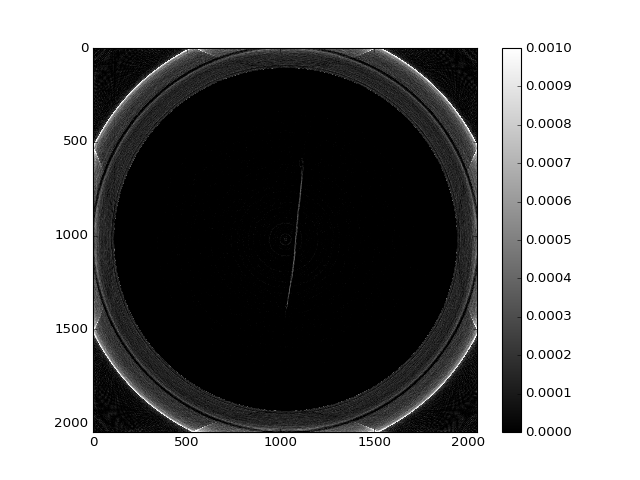

In [24]:
t0 = io.ImageFile(os.path.join(resdir, 'recon_0200.tiff')).data
plt.figure()
plt.imshow(t0, cmap='gray')
plt.clim(0, 0.001)
plt.colorbar()

<IPython.core.display.Javascript object>


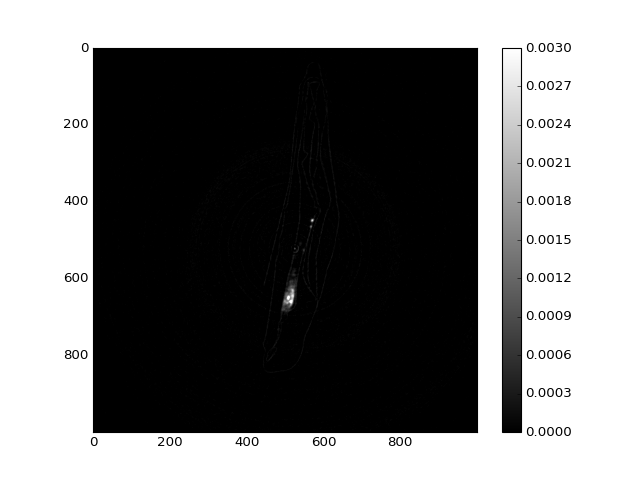

In [29]:
t0 = io.ImageFile(os.path.join(resdir, 'recon_1200.tiff')).data[500:1500, 500:1500]
plt.figure()
plt.imshow(t0, cmap='gray')
plt.clim(0, 0.003)
plt.colorbar()

# convert

In [30]:
outdir = '/HFIR/CG1D/IPTS-21115/shared/autoreduce/CT-group-2495/uchar'

In [31]:
!mkdir -p {outdir}

In [40]:
# rm {outdir}/*.tiff

In [48]:
%%time
for i, f in enumerate(glob.glob('%s/*.tiff' % resdir)):
    if i%10 == 0: print i
    bn = os.path.basename(f)
    outf = '%s/%s' % (outdir, bn)
    data = io.ImageFile(f).data[500:1500, 500:1500]
    oimg = io.ImageFile(outf)
    data[data<0] = 0
    data *= 255/max
    idata = np.array(data, dtype='uint8')
    oimg.data = idata
    oimg.save()
    # break
    continue

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
CPU times: user 36.9 s, sys: 19.5 s, total: 56.5 s
Wall time: 2min 25s


In [46]:
# ls {outdir}

In [54]:
!du -sh {outdir}

406M	/HFIR/CG1D/IPTS-21115/shared/autoreduce/CT-group-2495/uchar


In [51]:
ls -tlh {outdir}|head -n 10

total 405M
-rwxrwxr-- 1 lj7 users 977K Aug 12 09:47 recon_0180.tiff*
-rwxrwxr-- 1 lj7 users 977K Aug 12 09:47 recon_0348.tiff*
-rwxrwxr-- 1 lj7 users 977K Aug 12 09:47 recon_1112.tiff*
-rwxrwxr-- 1 lj7 users 977K Aug 12 09:47 recon_1076.tiff*
-rwxrwxr-- 1 lj7 users 977K Aug 12 09:47 recon_1159.tiff*
-rwxrwxr-- 1 lj7 users 977K Aug 12 09:47 recon_0303.tiff*
-rwxrwxr-- 1 lj7 users 977K Aug 12 09:47 recon_0267.tiff*
-rwxrwxr-- 1 lj7 users 977K Aug 12 09:47 recon_1391.tiff*
-rwxrwxr-- 1 lj7 users 977K Aug 12 09:47 recon_0497.tiff*
ls: write error


In [53]:
ls -1 {outdir}|wc -l

2048
